In [13]:
import kaggle
import pandas as pd
import numpy as np
import zipfile
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

In [14]:
df = pd.read_csv('df_clean.csv')

In [15]:
# Anzahl der Studenten pro Kurs
num_students = df['Course'].value_counts()

# Durchschnittliche Abschlussrate pro Kurs
course_graduates = df.groupby('Course')['Target_Graduate'].mean()

# Durchschnittliche Dropout-Rate pro Kurs
course_dropouts = df.groupby('Course')['Target_Dropout'].mean()

# Durchschnittliche Dropout-Rate pro Kurs
course_enrolled = df.groupby('Course')['Target_Enrolled'].mean()

# Series zu einem DataFrame kombinieren
combined_df = pd.concat([num_students, course_dropouts, course_graduates, course_enrolled], axis=1)

# Spaltennamen setzen
combined_df.columns = ['Num_Students', 'Dropout_Rate', 'Graduate_Rate', 'Enrolled_Rate']

print(combined_df)

      Num_Students  Dropout_Rate  Graduate_Rate  Enrolled_Rate
9500         12074      0.135249       0.772321       0.092430
9773          8214      0.222547       0.680058       0.097395
9238          7935      0.197353       0.665028       0.137618
9147          7741      0.333549       0.282005       0.384446
9254          5425      0.370876       0.374009       0.255115
9085          5373      0.324028       0.421738       0.254234
9670          4760      0.339916       0.431723       0.228361
9991          4057      0.599458       0.213705       0.186838
9003          3733      0.525583       0.279400       0.195017
9070          3281      0.210607       0.640963       0.148430
9853          3198      0.365541       0.281426       0.353033
9119          3004      0.598202       0.049601       0.352197
171           2859      0.712487       0.214760       0.072753
8014          2438      0.417145       0.477441       0.105414
9130          1606      0.546077       0.226650       0

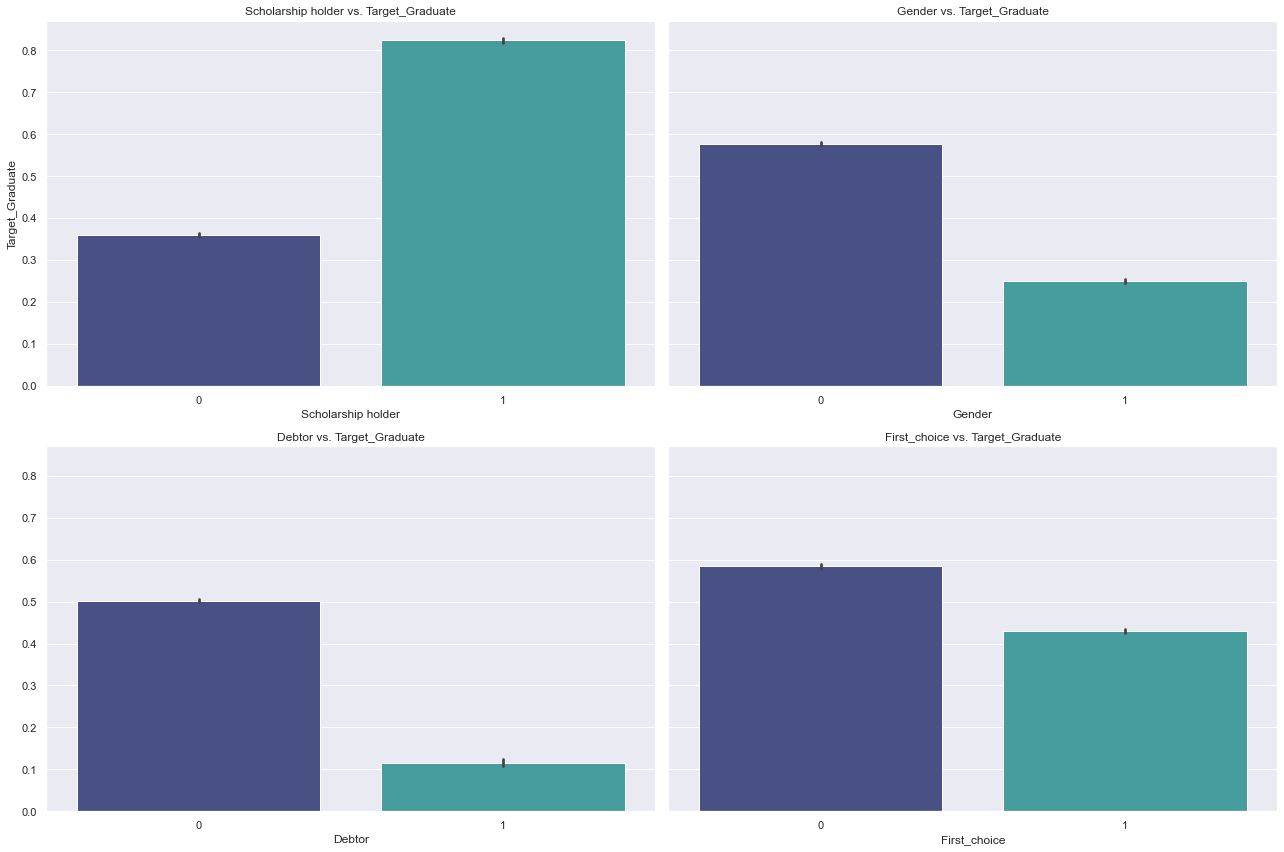

In [16]:
# Erstellen Sie eine Figur und Unterplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)

# Plot 1: Scholarship holder vs. Target_Graduate
sns.barplot(x='Scholarship holder', y='Target_Graduate', data=df, palette='mako', ax=axes[0, 0])
axes[0, 0].set_title('Scholarship holder vs. Target_Graduate')

# Plot 2: Gender vs. Target_Graduate
sns.barplot(x='Gender', y='Target_Graduate', data=df, palette='mako', ax=axes[0, 1])
axes[0, 1].set_title('Gender vs. Target_Graduate')
axes[0, 1].set_ylabel('')

# Plot 3: Debtor vs. Target_Graduate
sns.barplot(x='Debtor', y='Target_Graduate', data=df, palette='mako', ax=axes[1, 0])
axes[1, 0].set_title('Debtor vs. Target_Graduate')
axes[1, 0].set_ylabel('')

# Plot 4: First_choice vs. Target_Graduate
sns.barplot(x='First_choice', y='Target_Graduate', data=df, palette='mako', ax=axes[1, 1])
axes[1, 1].set_title('First_choice vs. Target_Graduate')
axes[1, 1].set_ylabel('')

# Layout anpassen
plt.tight_layout()

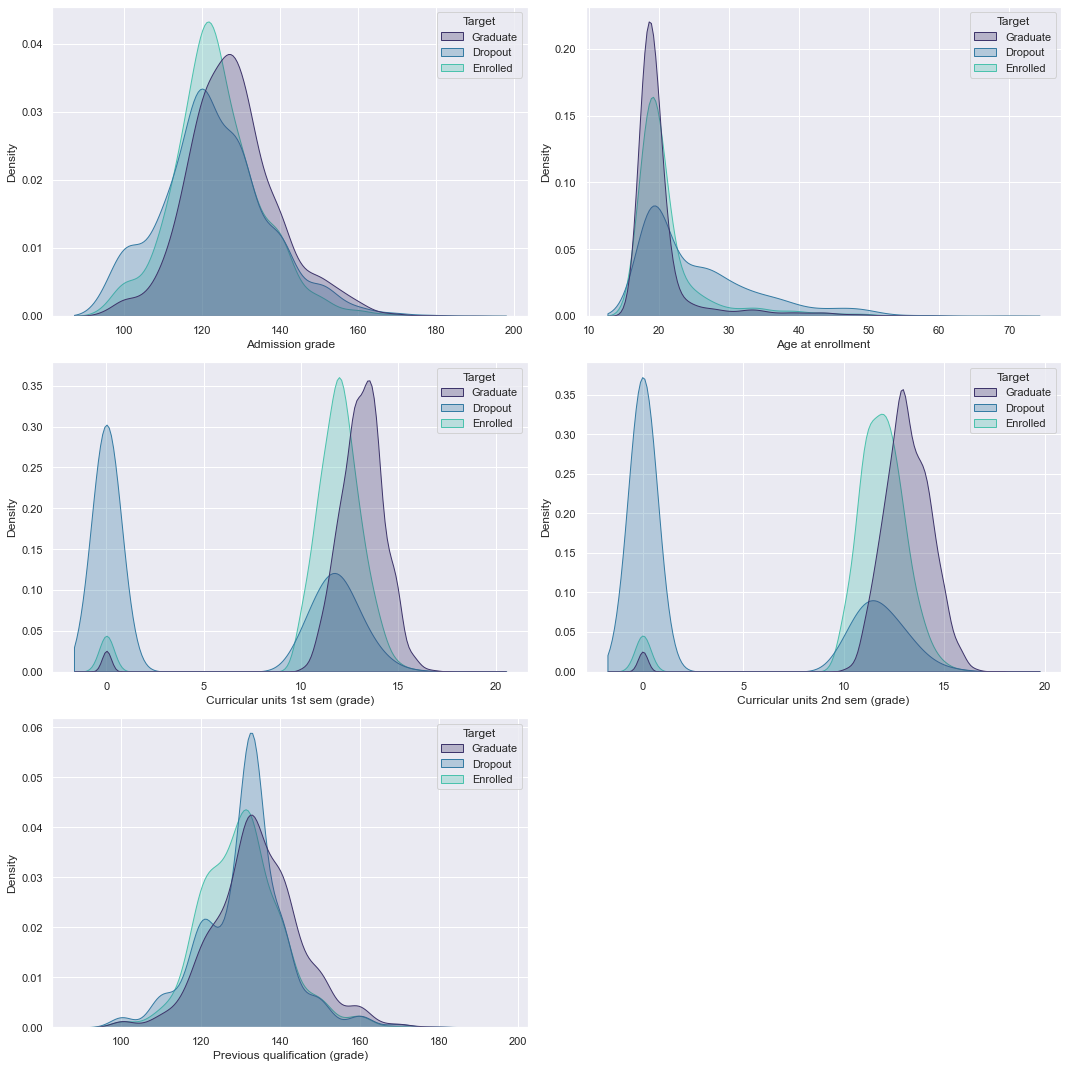

In [17]:
# Erstellen Sie eine Figur und Unterplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Admission grade
sns.kdeplot(data=df, x="Admission grade", hue='Target', bw_adjust=2, cumulative=False,
            common_norm=False, common_grid=True, fill=True, palette="mako",
            alpha=.3, linewidth=1, ax=axes[0, 0])

# Plot 2: Age at enrollment
sns.kdeplot(data=df, x="Age at enrollment", hue='Target', bw_adjust=2, cumulative=False,
            common_norm=False, common_grid=True, fill=True, palette="mako",
            alpha=.3, linewidth=1, ax=axes[0, 1])

# Plot 3: Curricular units 1st sem (grade)
sns.kdeplot(data=df, x="Curricular units 1st sem (grade)", hue='Target', bw_adjust=1,
            cumulative=False, common_norm=False, common_grid=True, fill=True,
            palette="mako", alpha=.3, linewidth=1, ax=axes[1, 0])

# Plot 4: Curricular units 2nd sem (grade)
sns.kdeplot(data=df, x="Curricular units 2nd sem (grade)", hue='Target', bw_adjust=1,
            cumulative=False, common_norm=False, common_grid=True, fill=True,
            palette="mako", alpha=.3, linewidth=1, ax=axes[1, 1])

# Plot 5: Previous qualification (grade)
sns.kdeplot(data=df, x="Previous qualification (grade)", hue='Target', bw_adjust=2,
            cumulative=False, common_norm=False, common_grid=True, fill=True,
            palette="mako", alpha=.3, linewidth=1, ax=axes[2, 0])

# Leeren Plot entfernen
fig.delaxes(axes[2, 1])

# Layout anpassen
plt.tight_layout()

# Anzeige der Plots
plt.show()


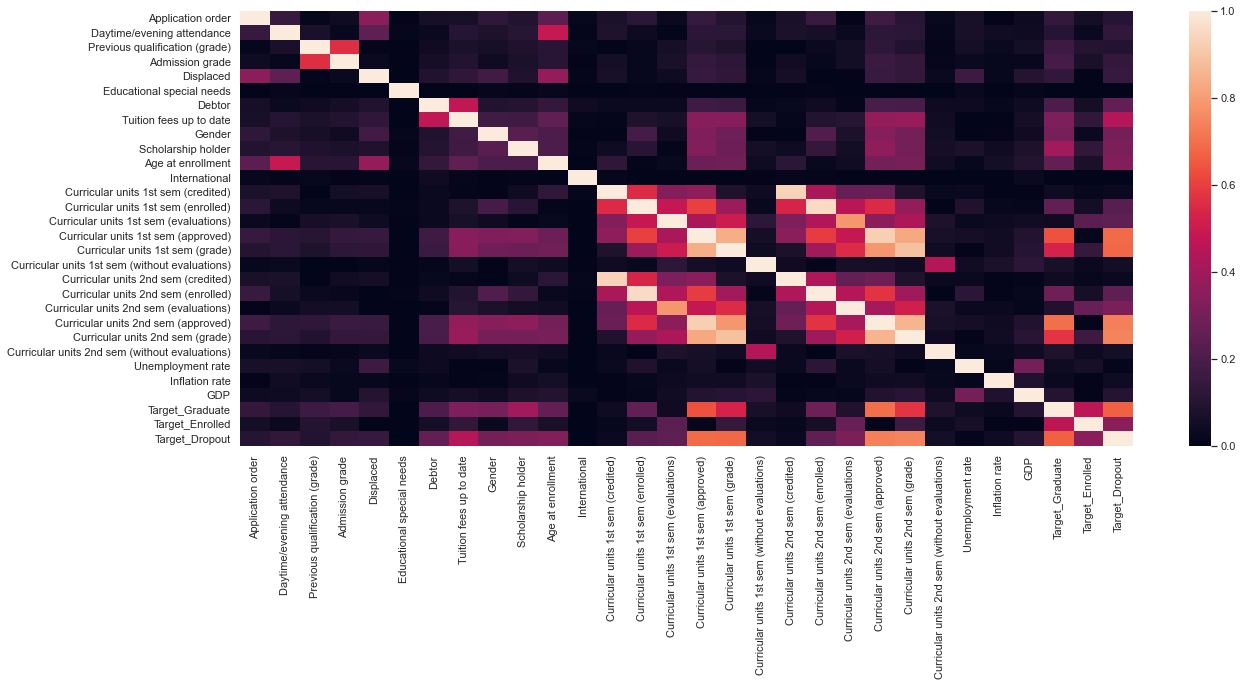

In [18]:
exog=['Application order', 'Daytime/evening attendance', 'Previous qualification (grade)', 'Admission grade',
      'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
      'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
      'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
      'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 
      'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
      'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
      'Inflation rate', 'GDP', 'Target_Graduate', 'Target_Enrolled', 'Target_Dropout']
heatmap = sns.heatmap(abs(df[exog].corr()), vmin=0, vmax=1)


In [19]:
abs(df[exog].corr())[['Target_Graduate', 'Target_Enrolled', 'Target_Dropout']].nlargest(8, columns='Target_Graduate')

,Target_Graduate,Target_Enrolled,Target_Dropout
Target_Graduate,1.000000,0.467736,0.667323
Curricular units 2nd sem (approved),0.697141,0.010648,0.731006
Target_Dropout,0.667323,0.346147,1.000000
Curricular units 1st sem (approved),0.637456,0.014705,0.689017
Curricular units 2nd sem (grade),0.574724,0.158332,0.743454
Curricular units 1st sem (grade),0.530917,0.139845,0.681377
Target_Enrolled,0.467736,1.000000,0.346147
Scholarship holder,0.401180,0.130278,0.316057


In [21]:
abs(df.corr())[['Target_Graduate', 'Target_Enrolled', 'Target_Dropout']].nlargest(25, columns='Target_Graduate')

,Target_Graduate,Target_Enrolled,Target_Dropout
Target_Graduate,1.000000,0.467736,0.667323
Curricular units 2nd sem (approved),0.697141,0.010648,0.731006
Target_Dropout,0.667323,0.346147,1.000000
Curricular units 1st sem (approved),0.637456,0.014705,0.689017
Curricular units 2nd sem (grade),0.574724,0.158332,0.743454
Curricular units 1st sem (grade),0.530917,0.139845,0.681377
Target_Enrolled,0.467736,1.000000,0.346147
Scholarship holder,0.401180,0.130278,0.316057
Tuition fees up to date,0.316555,0.131105,0.446479
Gender,0.304529,0.029621,0.298282
